<a href="https://colab.research.google.com/github/pdthang26/Artificial-Intellignece-ST7-1234/blob/EXERCISE/AI_W4_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d3fe7a9255c21a5fad7d4f525ad410e38ae79d6595f603fcc8704a15ae37cc90
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


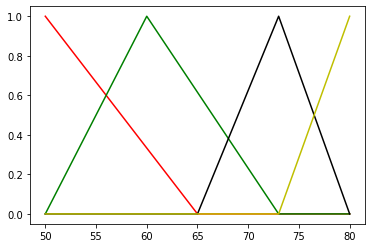

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x= np.arange (50,81,1)

slow = fuzz.trimf(x,[50,50,65])
medium = fuzz.trimf(x,[50,60,73])
medium_fast = fuzz.trimf(x,[65,73,80])
full_sppeed = fuzz.trimf(x,[73,80,80])

plt.figure()
plt.plot(x,slow,'r', linewidth = 1.5, label = 'Slow')
plt.plot(x,medium,'g', linewidth = 1.5, label = 'Medium')
plt.plot(x,medium_fast,'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x,full_sppeed,'y', linewidth = 1.5, label = 'full sppeed')




20.424083769633505


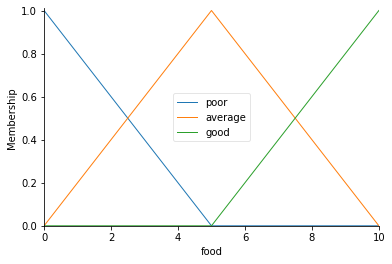

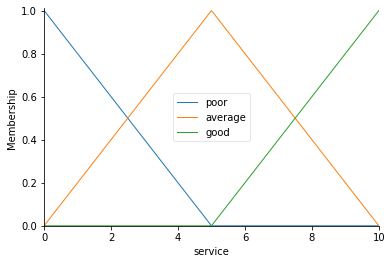

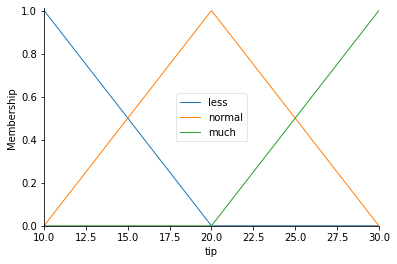

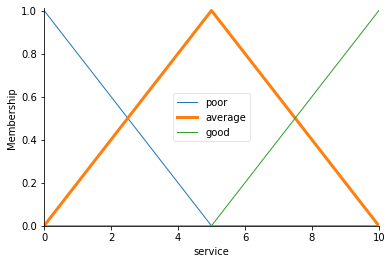

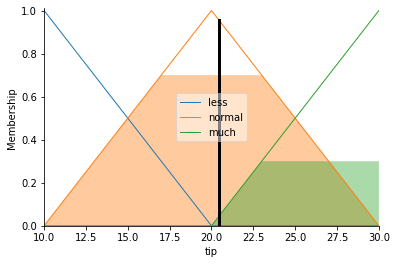

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] =fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])

service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] =fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

#Drawing membership diagram

food.view()
service.view()
tip.view()

service['average'].view()

#Create Rules
rule1 = ctrl.Rule(food['poor']&service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'], tip['less'])

rule4 = ctrl.Rule(food['average']&service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average']&service['good'], tip['much'])

rule7 = ctrl.Rule(food['good']&service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good']&service['average'], tip['normal'])
rule9 = ctrl.Rule(food['good']&service['good'], tip['much'])

#--------------------------------------------------------------------
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 6.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)


power is: 70.48148148148145 %


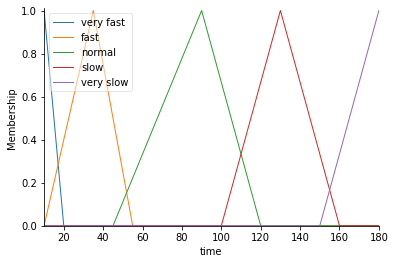

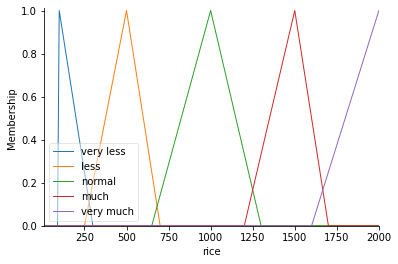

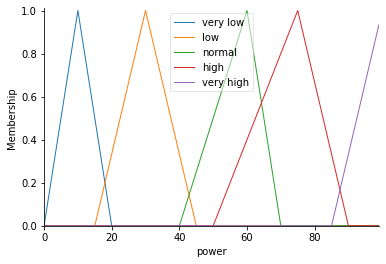

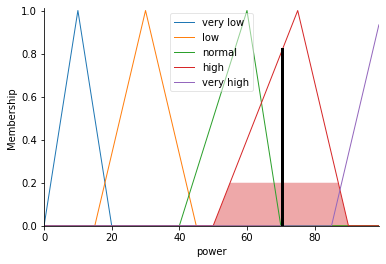

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,5), 'time')
rice = ctrl.Antecedent(np.arange(10,2001,10), 'rice')
power = ctrl.Consequent(np.arange(0,100,1),'power')

time['very fast'] = fuzz.trimf(time.universe, [10, 10, 20])
time['fast'] =fuzz.trimf(time.universe, [10,35,55])
time['normal'] = fuzz.trimf(time.universe, [45,90,120])
time['slow'] = fuzz.trimf(time.universe, [100,130,160])
time['very slow'] = fuzz.trimf(time.universe, [150,180,180])

rice['very less'] = fuzz.trimf(rice.universe, [100, 100, 300])
rice['less'] =fuzz.trimf(rice.universe, [250,500,700])
rice['normal'] = fuzz.trimf(rice.universe, [650,1000,1300])
rice['much'] = fuzz.trimf(rice.universe, [1200,1500,1700])
rice['very much'] = fuzz.trimf(rice.universe, [1600,2000,2000])

power['very low'] = fuzz.trimf(power.universe, [0, 10, 20])
power['low'] =fuzz.trimf(power.universe, [15,30,45])
power['normal'] = fuzz.trimf(power.universe, [40,60,70])
power['high'] = fuzz.trimf(power.universe, [50,75,90])
power['very high'] = fuzz.trimf(power.universe, [85,100,100])

#Drawing membership diagram

time.view()
rice.view()
power.view()

#Create Rules
rule1 = ctrl.Rule(time['very fast']&rice['very less'], power['high'])
rule2 = ctrl.Rule(time['fast']&rice['very less'], power['high'])
rule3 = ctrl.Rule(time['normal']&rice['very less'], power['normal'])
rule4 = ctrl.Rule(time['slow']&rice['very less'], power['very low'])
rule5 = ctrl.Rule(time['very slow']&rice['very less'], power['very low'])

rule6 = ctrl.Rule(time['very fast']&rice['less'], power['high'])
rule7 = ctrl.Rule(time['fast']&rice['less'], power['high'])
rule8 = ctrl.Rule(time['normal']&rice['less'], power['normal'])
rule9 = ctrl.Rule(time['slow']&rice['less'], power['low'])
rule10 = ctrl.Rule(time['very slow']&rice['less'], power['very low'])

rule11 = ctrl.Rule(time['very fast']&rice['normal'], power['very high'])
rule12 = ctrl.Rule(time['fast']&rice['normal'], power['very high'])
rule13 = ctrl.Rule(time['normal']&rice['normal'], power['high'])
rule14 = ctrl.Rule(time['slow']&rice['normal'], power['low'])
rule15 = ctrl.Rule(time['very slow']&rice['normal'], power['very low'])

rule16 = ctrl.Rule(time['very fast']&rice['much'], power['very high'])
rule17 = ctrl.Rule(time['fast']&rice['much'], power['very high'])
rule18 = ctrl.Rule(time['normal']&rice['much'], power['high'])
rule19 = ctrl.Rule(time['slow']&rice['much'], power['high'])
rule20 = ctrl.Rule(time['very slow']&rice['much'], power['normal'])

rule21 = ctrl.Rule(time['very fast']&rice['very much'], power['very high'])
rule22 = ctrl.Rule(time['fast']&rice['very much'], power['very high'])
rule23 = ctrl.Rule(time['normal']&rice['very much'], power['high'])
rule24 = ctrl.Rule(time['slow']&rice['very much'], power['high'])
rule25 = ctrl.Rule(time['very slow']&rice['very much'], power['normal'])

#--------------------------------------------------------------------
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['time'] = 15
tipping.input['rice'] = 300
tipping.compute()

print('power is:', tipping.output['power'],'%')
power.view(sim=tipping)